## Creating a graph with text data


### Initializing

In [1]:
import pandas as pd
import itertools

## Computing the hirarchical structure 

In [11]:
def graph_neighbours(G,parent,word,neighbour_data,layer_id):
    parent_node = word+parent+str(layer_id-1)
    total_occur = neighbour_data.nb_occur.sum()
    for idx,node_row in neighbour_data.iterrows():
        G.add_node(node_row.word+word+str(layer_id),name=node_row.word, occur=node_row.nb_occur)
        G.add_edge(parent_node,node_row.word+word+str(layer_id),weight=node_row.nb_occur*1.0/total_occur)
    return parent_node

### Creating the graph

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [20]:
def create_branch(G,parent,parent_id,node_word,list_of_words,layer_id,color):
    node_id = node_word+parent+str(layer_id)
    nb_occur = 1
    G.add_node(node_id,name=node_word, occur=nb_occur)
    G.add_edge(parent_id,node_id,weight=1)
    parent_node = node_id
    for word in list_of_words:
        node_id = word+parent_node+str(layer_id+1)
        G.add_node(node_id,name=word, occur=1,color=color)
        G.add_edge(parent_node,node_id,weight=1)
    return G

In [21]:
G = nx.DiGraph()
# root word
central_word = "Evia Cybernetics"
layer_id=0
parent = ''
central_id = central_word+parent+str(layer_id)
nb_occur = 1
G.add_node(central_id,name=central_word, occur=nb_occur)

In [22]:
# Main topic: Data visualization
node_word='Data visualization'
list_of_themes= ['D3.js','network visualization','Interactive charts','Dashboard','Javascript']
color='orange'
layer_id=1
parent = central_word
parent_id=central_id
G = create_branch(G,parent,parent_id,node_word,list_of_themes,layer_id,color)

In [23]:
# Main topic: Data exploration
node_word = 'Data exploration'
List_of_themes= ['Python','network visualization','Community detection','Data analysis']
color='blue'
layer_id = 1
parent = central_word
parent_id=central_id
G = create_branch(G,parent,parent_id,node_word,list_of_themes,layer_id,color)

In [24]:
# Main topic: Data classification
node_word = 'Data classification'
List_of_themes= ['Python','Machine learning','Clustering']
color='pink'
layer_id = 1
parent = central_word
parent_id=central_id
G = create_branch(G,parent,parent_id,node_word,list_of_themes,layer_id,color)

In [25]:
# Main topic: Applications
node_word = 'Applications'
List_of_themes= ['Recommender systems','Tracking social network activity', 'Guided data discovery']
color='black'
layer_id = 1
parent = central_word
parent_id=central_id
G = create_branch(G,parent,parent_id,node_word,list_of_themes,layer_id,color)

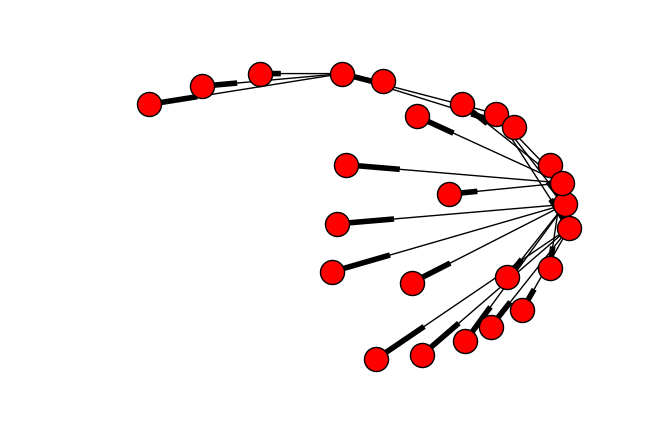

In [26]:
nx.draw_spring(G,)
plt.show()

In [27]:
G.size()

24

In [49]:
# Write the graph to a json file
from networkx.readwrite import json_graph
datag = json_graph.tree_data(G,root=candidat_id)
import json
s = json.dumps(datag)
#datag['links'] = [
#        {
#            'source': datag['nodes'][link['source']]['id'],
#            'target': datag['nodes'][link['target']]['id']
#        }
#        for link in datag['links']]
s = json.dumps(datag)
with open("viz/treegraph"+EviaC+".json", "w") as f:
    f.write(s)

### Open a web page for visualization

In [50]:
import webbrowser
url = 'http://localhost:8008/treegraphmarseille.html'
#webbrowser.open_new_tab(url)
webbrowser.open_new(url)

True

In [ ]:
G.edges(data='weight')

In [ ]:
clusterDic